The goal of this first notebook is to do some exploratory analysis of the main file in the dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline

In [7]:
#Read the main training dataset
raw_data = pd.read_csv('../Data/application_train.csv')
raw_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Get a quick sense of distribution of outcomes
print("overall percent with payment difficulties:")
print(raw_data.TARGET.mean())
print("percent of cash loans with payment difficulties:")
print(raw_data[raw_data['NAME_CONTRACT_TYPE']=='Cash loans']).TARGET.mean()
print("percent of revolving loans with payment difficulties")
print(raw_data[raw_data['NAME_CONTRACT_TYPE']=='Revolving loans']).TARGET.mean()
print("percent of male loans with payment difficulties:")
print(raw_data[raw_data['CODE_GENDER']=='M']).TARGET.mean()
print("percent of female loans with payment difficulties:")
print(raw_data[raw_data['CODE_GENDER']=='F']).TARGET.mean()

overall percent with payment difficulties:
0.0807288194569
percent of cash loans with payment difficulties:
0.0834591276345
percent of revolving loans with payment difficulties
0.0547832917791
percent of male loans with payment difficulties:
0.101419202543
percent of female loans with payment difficulties:
0.0699932822256


Given that most of the data has target = 0, we're going to employ SMOTE to oversample the minority class (target = 1) so that we don't predict target = 0 too often.

In [9]:
#Define predictor and response variables
y, X = dmatrices('TARGET ~ NAME_CONTRACT_TYPE + CODE_GENDER+ \
                  FLAG_OWN_CAR+ FLAG_OWN_REALTY+ CNT_CHILDREN+\
                  AMT_INCOME_TOTAL+ AMT_CREDIT+ AMT_ANNUITY+\
                  AMT_GOODS_PRICE+ NAME_TYPE_SUITE+ NAME_INCOME_TYPE+\
                  NAME_EDUCATION_TYPE+NAME_FAMILY_STATUS+ NAME_HOUSING_TYPE+\
                  REGION_POPULATION_RELATIVE+ DAYS_BIRTH+ DAYS_EMPLOYED+\
                  DAYS_REGISTRATION+ DAYS_ID_PUBLISH+ OWN_CAR_AGE+ FLAG_MOBIL+\
                  OCCUPATION_TYPE+ REGION_RATING_CLIENT+\
                  REGION_RATING_CLIENT_W_CITY+ WEEKDAY_APPR_PROCESS_START+ \
                  ORGANIZATION_TYPE+ DAYS_LAST_PHONE_CHANGE',
                raw_data,
                return_type = "dataframe")

In [10]:
y = np.ravel(y)

In [11]:
#SMOTE
sm = SMOTE(random_state = 325, ratio = 'minority', k_neighbors = 3)
X_train_res, y_train_res = sm.fit_sample(X, y)

In [12]:
clf = RandomForestClassifier(n_estimators=20, random_state = 0)
clf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
clf.score(X_train_res, y_train_res)

0.9968504896980535

In [14]:
predicted = clf.predict(X_train_res)

In [15]:
pd.crosstab(y_train_res, predicted, rownames=['actual payment difficulties or not'], colnames = ['payment difficulties prediction'])

payment difficulties prediction,0.0,1.0
actual payment difficulties or not,,
0.0,73821,0
1.0,465,73356


In [16]:
fpr, tpr, threshold = metrics.roc_curve(y_train_res, predicted)
roc_auc = metrics.auc(fpr, tpr)

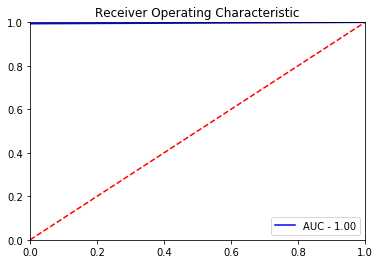

In [17]:
#Plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC - %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()